# Timing hadamard_real functions

This code uses the magic function `%timeit`<sup> 1 2 </sup> to measure the excetution time of functions `hadamard_real_dumb` , `hadamard_real_numpy`, `hadamard_real_numba` and `hadamard_real_parallel`.

* <sup> 1 </sup>[Profiling and Timing Code - excerpt from the Python Data Science Handbook by Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/01.07-timing-and-profiling.html)

* <sup> 2 </sup>[Python documentation - timeit — Measure execution time of small code snippets](https://docs.python.org/3/library/timeit.html)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import functions as fcs
from tqdm.notebook import tqdm as tq # produce the progress bar

### Timing for vectors

In [5]:
# number of elements forming the vectors
N_vec = np.array([500, 700, 1000, 1500, 2000, 5000, 10000])

In [6]:
list_time_dumb = []
list_time_numpy = []
list_time_numba = []
for Ni in tq(N_vec):
    data = np.ones(Ni)
    # hadamard_real_dumb
    time = %timeit -o fcs.hadamard_real_dumb(data, data)
    list_time_dumb.append(time.average)
    # hadamard_real_numpy
    time = %timeit -o fcs.hadamard_real_numpy(data, data)
    list_time_numpy.append(time.average)
    # hadamard_real_numba
    time = %timeit -o fcs.hadamard_real_numba(data, data)
    list_time_numba.append(time.average)

272 µs ± 9.35 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
2.36 µs ± 15.8 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
1.57 µs ± 26.2 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
79.1 µs ± 1.76 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
363 µs ± 4.81 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
2.56 µs ± 67.1 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
1.58 µs ± 21.5 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
107 µs ± 1.54 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
536 µs ± 4.67 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
2.67 µs ± 47.2 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
1.65 µs ± 6.12 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
151 µs ± 414 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
805 µs ± 3.86 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
2.93 µs ± 83.2 ns per loop (mean ± std. 

In [7]:
list_vector_time_dumb = np.array(list_time_dumb)
list_vector_time_numpy = np.array(list_time_numpy)
list_vector_time_numba = np.array(list_time_numba)

### Timing for matrices

In [8]:
# number of elements forming the matrices
N_mat = np.array([20, 30, 40, 50, 60, 70, 80, 90, 100])

In [9]:
list_time_dumb = []
list_time_numpy = []
list_time_numba = []
for Ni in tq(N_mat):
    data = np.ones((Ni,Ni))
    # hadamard_real_dumb
    time = %timeit -o fcs.hadamard_real_dumb(data, data)
    list_time_dumb.append(time.average)
    # hadamard_real_numpy
    time = %timeit -o fcs.hadamard_real_numpy(data, data)
    list_time_numpy.append(time.average)
    # hadamard_real_numba
    time = %timeit -o fcs.hadamard_real_numba(data, data)
    list_time_numba.append(time.average)

288 µs ± 11 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
2.17 µs ± 21.7 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
1.7 µs ± 13.9 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
79.5 µs ± 33.5 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
605 µs ± 29.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
2.58 µs ± 12.4 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
2.01 µs ± 34.6 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
145 µs ± 1.05 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
1.08 ms ± 7.12 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
2.85 µs ± 18.8 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
2.75 µs ± 22.5 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
256 µs ± 1.02 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.65 ms ± 18.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
3.41 µs ± 10.8 ns per loop (mean ± std. dev. of 

In [10]:
list_matrix_time_dumb = np.array(list_time_dumb)
list_matrix_time_numpy = np.array(list_time_numpy)
list_matrix_time_numba = np.array(list_time_numba)

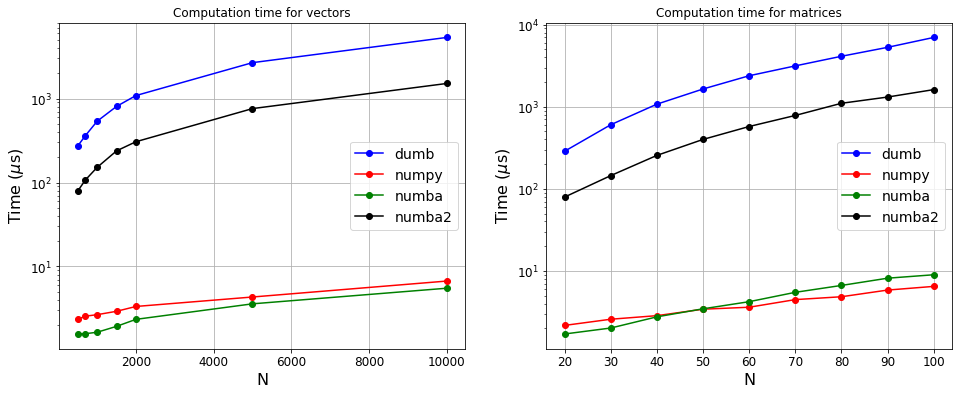

In [11]:
plt.figure(figsize=(16,6))

plt.subplot(121)
plt.title('Computation time for vectors')
plt.plot(N_vec, list_vector_time_dumb*1e6, 'bo-', label = 'dumb')
plt.plot(N_vec, list_vector_time_numpy*1e6, 'ro-', label = 'numpy')
plt.plot(N_vec, list_vector_time_numba*1e6, 'go-', label = 'numba')
plt.legend(loc = 'best', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('N', fontsize = 16)
plt.ylabel('Time ($\mu$s)', fontsize = 16)
plt.yscale('log')
plt.grid()

plt.subplot(122)
plt.title('Computation time for matrices')
plt.plot(N_mat, list_matrix_time_dumb*1e6, 'bo-', label = 'dumb')
plt.plot(N_mat, list_matrix_time_numpy*1e6, 'ro-', label = 'numpy')
plt.plot(N_mat, list_matrix_time_numba*1e6, 'go-', label = 'numba')
plt.legend(loc = 'best', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('N', fontsize = 16)
plt.ylabel('Time ($\mu$s)', fontsize = 16)
plt.yscale('log')
plt.grid()

plt.show()